<a href="https://colab.research.google.com/github/mahmutakar0/Bk/blob/main/satislar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satış analizi


## A-) Verinin işlenmesi


Gerekli kütüphanelerin yüklenmesi

In [33]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


Verinin işlenmesi

In [34]:
# df değişkeninin tanımlanması
url= "https://raw.githubusercontent.com/mahmutakar0/Beksan/main/ddata.csv"

satis = pd.read_csv(url, sep=";")
df = satis.copy()

print(df.columns)
df.head(2)

Index(['STOK_ADI', 'MUSTERI_KODU', 'MUSTERI_ISMI', 'FATURA_NO', 'TARIH',
       'MIKTAR3', 'TL/KG', 'USD/KG', 'FIYAT', 'NET_TUTAR', 'DOV_FIYAT',
       'DOV_TUTAR', 'KUR', 'ISLEM_TURU', 'SUBE_KODU', 'UNVAN', 'STOKGRUP_ISMI',
       'STOKKOD4_ISMI', 'STOKKOD5_ISMI', 'SATIS_TEMSILCISI_KODU', 'SEHİR',
       'ULKE_KODU', 'CARI_ACILIS', 'CARI_GRUP_KODU', 'DAHIL', 'ISLEM_YERI'],
      dtype='object')


,STOK_ADI,MUSTERI_KODU,MUSTERI_ISMI,FATURA_NO,TARIH,MIKTAR3,TL/KG,USD/KG,FIYAT,NET_TUTAR,...,STOKGRUP_ISMI,STOKKOD4_ISMI,STOKKOD5_ISMI,SATIS_TEMSILCISI_KODU,SEHİR,ULKE_KODU,CARI_ACILIS,CARI_GRUP_KODU,DAHIL,ISLEM_YERI
0,"DÖKME ÇIVI-RING 2,50x030x6,1mm-25 KG.",120.02.ES008,PISO Y PARED DE ESPANA SL,IHR000000000189,12.06.2020,3000,"5,374193","0,792338351","5,37419333","16122,57999",...,MAMUL,03.RİNG DÖKME,2.OVALI ÇİVİLER,KE,CASTELLON,ES,26.05.2014,8.0,DIGER,Y.DISI
1,"DÖKME ÇIVI-RING 2,50x030x6,1mm-25 KG.",120.02.ES008,PISO Y PARED DE ESPANA SL,IHR000000000246,29.07.2020,3000,"7,12824","1,035389129","7,12824","21384,72",...,MAMUL,03.RİNG DÖKME,2.OVALI ÇİVİLER,KE,CASTELLON,ES,26.05.2014,8.0,DIGER,Y.DISI


In [35]:
# df tablo
df = df[[ "TARIH","MUSTERI_ISMI", "MIKTAR3", "DOV_TUTAR", "STOKKOD5_ISMI", "SEHİR", "ULKE_KODU", "ISLEM_YERI"]]
df.head(2)

,TARIH,MUSTERI_ISMI,MIKTAR3,DOV_TUTAR,STOKKOD5_ISMI,SEHİR,ULKE_KODU,ISLEM_YERI
0,12.06.2020,PISO Y PARED DE ESPANA SL,3000,"2377,015052",2.OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
1,29.07.2020,PISO Y PARED DE ESPANA SL,3000,"3106,167388",2.OVALI ÇİVİLER,CASTELLON,ES,Y.DISI


In [36]:
# df tablo güncellemesi
df = df.rename(columns={"TARIH": "tarih", "MUSTERI_ISMI": "musteri", "MIKTAR3": "kg", "DOV_TUTAR": "tutar", "STOKKOD5_ISMI": "ürün","SEHİR": "sehir", "ULKE_KODU": "ülke", "ISLEM_YERI": "yer"})
df["ürün"] = df["ürün"].replace("1.DÜZ ÇİVİLER", "DÜZ ÇİVİLER")
df["ürün"] = df["ürün"].replace("2.OVALI ÇİVİLER", "OVALI ÇİVİLER")
df["ürün"] = df["ürün"].replace("3.T.DİZ.ÇİVİLER", "T.DİZ.ÇİVİLER")
df["ürün"] = df["ürün"].replace("4.TELLER", "TELLER")
df["ürün"] = df["ürün"].replace("5.PLASTİĞE DİZİLİ ÇİVİLER", "PLASTİĞE DİZİLİ ÇİVİLER")

# df info
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29204 entries, 0 to 29203
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tarih    29204 non-null  object
 1   musteri  29204 non-null  object
 2   kg       29204 non-null  object
 3   tutar    29140 non-null  object
 4   ürün     29204 non-null  object
 5   sehir    29046 non-null  object
 6   ülke     29204 non-null  object
 7   yer      29204 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB
None


,tarih,musteri,kg,tutar,ürün,sehir,ülke,yer
0,12.06.2020,PISO Y PARED DE ESPANA SL,3000,"2377,015052",OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
1,29.07.2020,PISO Y PARED DE ESPANA SL,3000,"3106,167388",OVALI ÇİVİLER,CASTELLON,ES,Y.DISI


In [37]:
df.head()

,tarih,musteri,kg,tutar,ürün,sehir,ülke,yer
0,12.06.2020,PISO Y PARED DE ESPANA SL,3000,"2377,015052",OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
1,29.07.2020,PISO Y PARED DE ESPANA SL,3000,"3106,167388",OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
2,22.12.2020,"MUNDOPALET, S.L.",3750,"3339,874166",OVALI ÇİVİLER,VALENCIA,ES,Y.DISI
3,23.12.2020,"MUNDOPALET, S.L.",1000,"895,3095537",OVALI ÇİVİLER,VALENCIA,ES,Y.DISI
4,14.05.2020,"MUNDOPALET, S.L.",3750,"2838,18653",OVALI ÇİVİLER,VALENCIA,ES,Y.DISI


In [38]:
# df columnlarının veri tipini düzenleme
df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%Y')
df['tutar'] = df['tutar'].str.replace(',', '.').astype(float)
df['kg'] = df['kg'].str.replace(',', '.').astype(float)
df['tutar'] = df['tutar'].round(2)
df['kg'] = df['kg'].round(2)
df.info()

df.dropna(subset=['tutar'], inplace=True)
dfc = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29204 entries, 0 to 29203
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tarih    29204 non-null  datetime64[ns]
 1   musteri  29204 non-null  object        
 2   kg       29204 non-null  float64       
 3   tutar    29140 non-null  float64       
 4   ürün     29204 non-null  object        
 5   sehir    29046 non-null  object        
 6   ülke     29204 non-null  object        
 7   yer      29204 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.8+ MB


#### Gün

In [39]:
# df_grouped_tarih değişkeninin oluşturulması
df_grouped_tarih = df.groupby(by ="tarih")[["kg", "tutar"]].sum().sort_values(by="tarih", ascending=True)
df_grouped_tarih = df_grouped_tarih.reset_index()
df_grouped_tarih.head(2)

,tarih,kg,tutar
0,2020-01-02,14201.89,12312.11
1,2020-01-03,69011.31,59062.82


#### İstatiksel veriler

In [40]:
def check_df(df_grouped_tarih, head=5):
    print("##################### Shape #####################")
    print(df_grouped_tarih.shape)
    print("##################### Types #####################")
    print(df_grouped_tarih.dtypes)
    print("##################### Head #####################")
    print(df_grouped_tarih.head(head))
    print("##################### Tail #####################")
    print(df_grouped_tarih.tail(head))
    print("##################### NA #####################")
    print(df_grouped_tarih.isnull().sum())
    print("##################### Quantiles #####################")
    print(df_grouped_tarih.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_grouped_tarih)

##################### Shape #####################
(918, 3)
##################### Types #####################
tarih    datetime64[ns]
kg              float64
tutar           float64
dtype: object
##################### Head #####################
       tarih        kg     tutar
0 2020-01-02  14201.89  12312.11
1 2020-01-03  69011.31  59062.82
2 2020-01-06  34740.12  31791.48
3 2020-01-07  36840.47  33230.49
4 2020-01-08  55967.35  44958.17
##################### Tail #####################
         tarih        kg     tutar
913 2023-09-04  67167.57  60317.98
914 2023-09-05  29995.74  31574.03
915 2023-09-06  22601.77  27377.45
916 2023-09-07  33022.28  27900.15
917 2023-09-08  66424.98  59720.30
##################### NA #####################
tarih    0
kg       0
tutar    0
dtype: int64
##################### Quantiles #####################
       0.00        0.05       0.50         0.95         0.99       1.00
kg      0.0  12837.7350  59907.520  145972.2775  227403.9396  447980.00
tutar   

<ipython-input-40-95c93459328a>:13: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [41]:
# Günlük satışlar grafiği
fig = px.scatter(df_grouped_tarih, x='tarih', y='tutar', title='Günlük satışlar')
fig.update_layout(title='Günlük satışlar', xaxis_title='Tarih', yaxis_title='Değer', title_x=0.5)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

#### Ay

In [42]:
# df_grouped_taring değişkeninin oluşturulması
df_grouped_tarih["tarihm"] = pd.to_datetime(df_grouped_tarih["tarih"], format="%m.%Y")
df_grouped_tarih["tarihm"] = df_grouped_tarih["tarih"].dt.to_period("M").dt.to_timestamp()
df_grouped_taring = df_grouped_tarih.groupby(by ="tarihm")[["kg", "tutar"]].sum().sort_values(by="tarihm", ascending=True)
df_grouped_taring = df_grouped_taring.reset_index()
df_grouped_taring = df_grouped_taring.drop([44])
df_grouped_taring["ma6"] = df_grouped_taring["tutar"].rolling(window=6).mean()

# aylık satış grafiği
fig = px.scatter(df_grouped_taring, x='tarihm', y='tutar', title='Aylık satışlar')
fig.update_layout(title='Aylık satışlar', xaxis_title='Tarih', yaxis_title='Tutar($)', title_x=0.5)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

##### Aylık SMA değerleri

In [43]:
# sma değişkeninin oluşturulması ve grafiği
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar"], name="Tutar($)"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["ma6"], name="SMA6"), secondary_y=True)
fig.update_layout(title_text="Tutar($) ve 6 Aylık Basit Hareketli Otalama (SMA) Değeri", title_x=0.5)
fig.update_xaxes(title_text="Tarih")
fig.update_yaxes(title_text="Değer", secondary_y=False)
fig.update_yaxes(title_text="SMA6", secondary_y=True)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

##### Aylık CMA değeri

In [44]:
# cma değişkeninin oluşturulması ve grafiği

df_grouped_taring["cma"] = df_grouped_taring["tutar"].expanding().mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar"], name="Tutar($)"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["cma"], name="CMA"), secondary_y=True)

fig.update_layout(title_text="Tutar($) ve Aylık Biriken Hareketli Ortalama(CMA) Değeri", title_x=0.5)
fig.update_xaxes(title_text="Tarih")
fig.update_yaxes(title_text="Değer", secondary_y=False)
fig.update_yaxes(title_text="CMA", secondary_y=True)
fig.update_yaxes(
    hoverformat=",.0f")

fig.show()

##### Aylık EMA değeri

In [45]:
# ema'nın tanımlanması
def ema(values, alpha):
    ema = [values[0]]
    for value in values[1:]:
        ema.append(alpha * value + (1 - alpha) * ema[-1])
    return ema
df_grouped_taring["tutar_ema"] = ema(df_grouped_taring["tutar"], alpha=0.2)

# emanın satışlar ile grafiği
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar"], name="Tutar($)"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar_ema"], name="EMA"), secondary_y=True)
fig.update_layout(title_text="Tutar($) ve Aylık Üstel Hareketli Ortalama(EMA) Değeri", title_x=0.5)
fig.update_xaxes(title_text="Tarih")
fig.update_yaxes(title_text="Değer", secondary_y=False)
fig.update_yaxes(title_text="EMA", secondary_y=True)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

#### Ülke

In [46]:
# grouped_ülke_D değişkeninin oluşturulması
grouped_ülke =df.groupby(by= "ülke")[["kg", "tutar"]].sum().reset_index()
grouped_ülke = grouped_ülke.rename(columns={"tutar": "Toplam tutar($)", "kg": "Kg miktarı"})
grouped_ülke_kg = grouped_ülke.sort_values(by= "Kg miktarı", ascending=False).reset_index()
grouped_ülke_D = grouped_ülke.sort_values(by= "Toplam tutar($)", ascending= False).reset_index()

# Ülke satış grafiği
fig = px.bar(grouped_ülke, x='ülke', y=['Toplam tutar($)', 'Kg miktarı'],
              labels={'ülke': 'Ülke', 'value': 'Değer'},
              barmode='group')


fig.update_layout(title={'text': 'Ülkeye Göre Satış Verisi', 'x': 0.5},legend_title=None)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

#### Firma

In [47]:
# grouped_firma değişkeninin oluşturulması
grouped_firma = df.groupby( by= "musteri")[["kg","tutar"]].sum()
grouped_firma = grouped_firma.sort_values(by="tutar",ascending=False).reset_index()
grouped_firma.head(2)

,musteri,kg,tutar
0,"PRIMESOURCE BUILDING PRODUCTS,INC.",5486993.64,7044248.34
1,METROPOLITAN STAPLE CORP.,4715598.66,5492207.16


##### Yurt dışı

In [48]:
# ydisi_mus_D10 değişkeninin oluşturulması
ydisi = dfc[dfc['yer'] != 'Y.IÇI'].copy()
ydisi_mus_D = ydisi.groupby( by= "musteri")[["kg","tutar"]].sum().reset_index()
ydisi_mus_D = ydisi_mus_D.sort_values(by="tutar",ascending=False)
ydisi_mus_D50 = ydisi_mus_D.head(50).reset_index()


# Yurt dışı satış grafiği
fig = px.bar(ydisi_mus_D50, x='musteri', y=['tutar', 'kg'],
              labels={'musteri': 'Müşteri', 'value': 'Değer'},
              barmode='group')

fig.update_layout(title={'text': 'Yurt Dışı Satış Verisi (ilk 20)', 'x': 0.5},legend_title=None)
fig.update_xaxes(
        ticktext=['PRIMESOURCE  B', 'METROPOLITAN S', 'MADERAS V', 'SHANDEX CO', 'AGLOLAK SL', 'PALSER B'
        , 'MATERIALES Y ', 'THIBO', 'SCOTT T', 'JZW I', 'PISO Y', 'JAMES J', 'MADECA-M', 'SPIKER AS'
        , 'MADERAS A', 'PALLETS J', 'METALHOUSE S', 'EMBALATEC I', 'PGB-EUROPE', 'MID CORK P'],
        tickvals=ydisi_mus_D50['musteri'])

fig.update_yaxes(hoverformat=",.0f")


##### Yurt içi

In [49]:
# yiçi_mus_D10 değişkeninin oluşturulması

yiçi = dfc[dfc['yer'] != 'Y.DISI'].copy()

yiçi_mus_D = yiçi.groupby( by= "musteri")[["kg","tutar"]].sum().reset_index()
yiçi_mus_D = yiçi_mus_D.sort_values(by="tutar",ascending=False)
yiçi_mus_D10 = yiçi_mus_D.head(10)

# Yurt içi satış grafiği
fig = px.bar(yiçi_mus_D10, x='musteri', y=['tutar', 'kg'],
              labels={'musteri': 'Müşteri', 'value': 'Değer'},
              barmode='group')

fig.update_layout(title={'text': 'Yurt İçi Satış Verisi (ilk 10)', 'x': 0.5},legend_title=None)

fig.update_xaxes(
    ticktext=['BEKKİLER M', 'ALTINOK T', 'YURTERİ O', 'TENERLER O', 'SONÇAĞ T', 'NİF O', 'EMRULLAH Y', 'METAL M', 'TAÇ P', 'DADAŞLAR A'],
    tickvals=yiçi_mus_D10['musteri'])

fig.update_yaxes(hoverformat=",.0f")

fig.show()

#### Ürün

In [50]:
# grouped_ürün değişkeninin oluşturulması
grouped_ürün = df.groupby( by= "ürün")[["kg","tutar"]].sum()
grouped_ürün = grouped_ürün.sort_values(by="tutar",ascending=False).reset_index()

# Ürün satış grafiği
fig = px.bar(grouped_ürün, x='ürün', y=['tutar', 'kg'],
              labels={'musteri': 'Müşteri', 'value': 'Değer'},
              barmode='group')
fig.update_layout(title={'text': 'Ürünlerin Satış Verileri', 'x': 0.5},legend_title=None)

fig.update_xaxes(
    ticktext=["T.DİZ.ÇİVİLER", "OVALI ÇİVİLER", "DÜZ ÇİVİLER", "PLASTİĞE DİZİLİ ÇİVİLER", "TELLER"],
    tickvals=grouped_ürün['ürün'])
fig.update_yaxes(hoverformat=",.0f")

fig.show()

## B-) Tahmin Modelleri

#### Polinom regresyon

In [51]:
grouped_aya = df_grouped_taring.copy()
grouped_aya.head(2)
dfpoli = grouped_aya[["tarihm","tutar"]]

x = dfpoli["tarihm"]
y = dfpoli["tutar"].to_numpy()

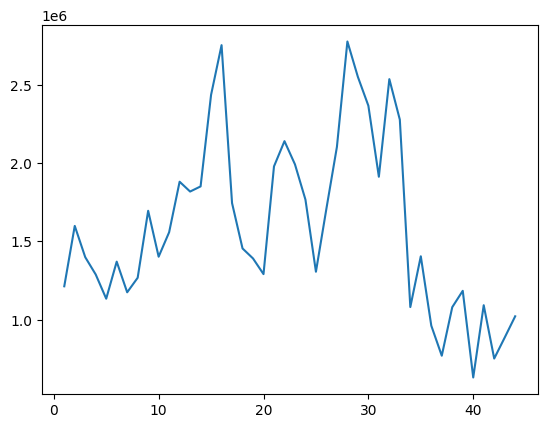

#####################################################################
#####################################################################


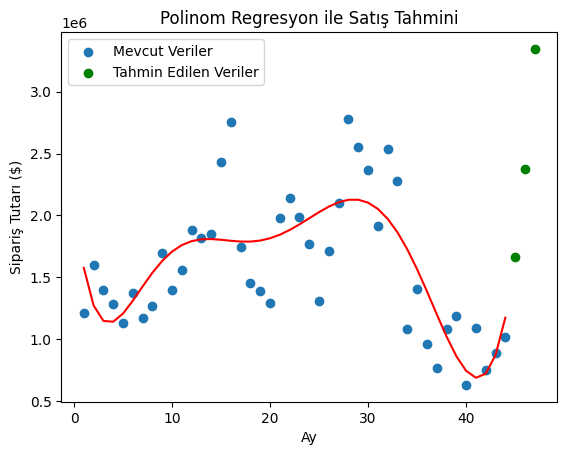

#####################################################################
#####################################################################
Tahmin hatası: 126471435203.42198
R kare katsayısı: 0.5775295528150333
Ortalama mutlak hata (MAE): 279845.59857911663


In [52]:
# Model
grouped_aya = df_grouped_taring.copy()
numbers = list(range(1, 45)) # ay sırasını temsilen yapılan numaralandırma
grouped_aya = grouped_aya.assign(numbers=numbers)

grouped_aya = grouped_aya[["numbers", "tutar"]]
grouped_aya.rename(columns={"numbers": "ay_no", }, inplace=True)

grouped_ayac = grouped_aya.copy()

x = grouped_aya["ay_no"].to_numpy()
y = grouped_aya["tutar"].to_numpy()

plt.plot(x,y)
plt.show()



print("#####################################################################")
print("#####################################################################")



# Reshape
x = x.reshape(44,1)
y= y.reshape(44,1)

# model- tahmin
tahminpolinom = PolynomialFeatures(degree=7)
Xyeni = tahminpolinom.fit_transform(x)

polinommodel = LinearRegression()
polinommodel.fit(Xyeni, y)

x_tahmin = np.array([45, 46, 47])
Xyeni_tahmin = tahminpolinom.transform(x_tahmin.reshape(-1, 1))
y_tahmin = polinommodel.predict(Xyeni_tahmin)

# Modelin görselleştirilmesi
plt.scatter(x, y, label='Mevcut Veriler')
plt.scatter(x_tahmin, y_tahmin, color='green', label='Tahmin Edilen Veriler')  # x_tahmin ve y_tahmin'i ekleyin

plt.plot(x, polinommodel.predict(Xyeni), color='red')
plt.title("Polinom Regresyon ile Satış Tahmini", fontdict={"fontsize": 12})
plt.xlabel('Ay')
plt.ylabel('Sipariş Tutarı ($)')
plt.legend()
plt.show()


print("#####################################################################")
print("#####################################################################")



# Hata değerleri
ycyeni = polinommodel.predict(Xyeni)
tahmin_hatasi = np.mean((y - ycyeni)**2)
r_kare = 1 - (np.sum((y - ycyeni)**2) / np.sum((y - np.mean(y))**2))
mae = np.mean(np.abs(y - ycyeni))

print("Tahmin hatası:", tahmin_hatasi)
print("R kare katsayısı:", r_kare)
print("Ortalama mutlak hata (MAE):", mae)


### Fb-prophet

<ipython-input-53-3c898d8cd709>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/vdujm5gc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/ymje9vyg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41215', 'data', 'file=/tmp/tmpedc0eqid/vdujm5gc.json', 'init=/tmp/tmpedc0eqid/ymje9vyg.json', 'output', 'file=/tmp/tmpedc0eqid/prophet_model1o57qhm

#####################################################################
#####################################################################
          ds          yhat    yhat_lower    yhat_upper
0 2023-08-01  1.423620e+06  7.944772e+05  2.047046e+06
1 2023-09-01  2.129816e+06  1.479177e+06  2.795948e+06
2 2023-10-01  1.110393e+06  4.909951e+05  1.713230e+06
3 2023-11-01  1.743379e+06  1.113734e+06  2.365973e+06
4 2023-12-01  1.177402e+06  4.917062e+05  1.796603e+06
#####################################################################
#####################################################################


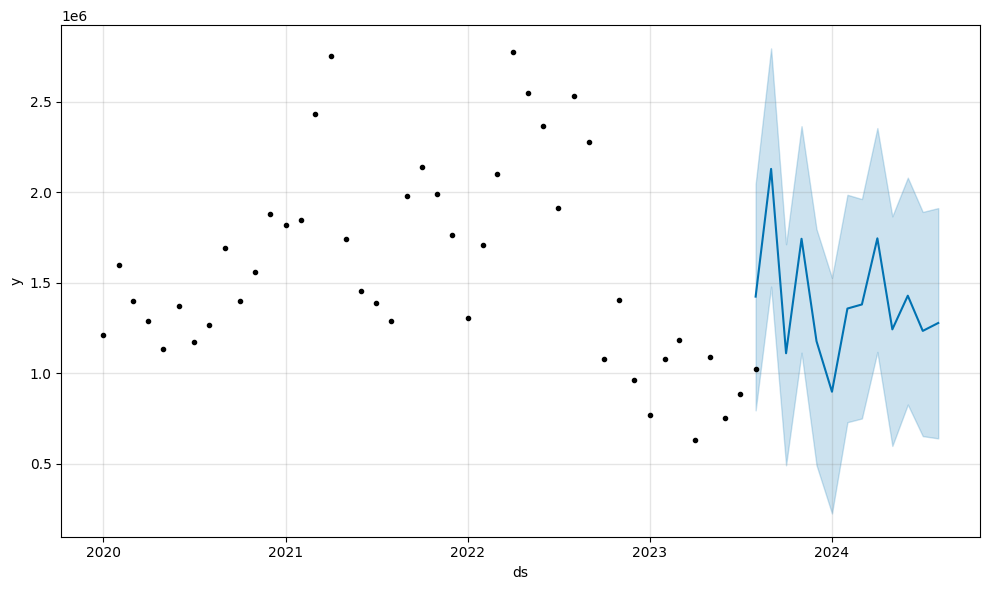

<ipython-input-53-3c898d8cd709>:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/9701th9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/pjry738m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40360', 'data', 'file=/tmp/tmpedc0eqid/9701th9f.json', 'init=/tmp/tmped

#####################################################################
#####################################################################


05:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Bunun adı: verbose false:
MAE: 1497198.823


In [53]:
# Toplam satış tahminin prophet ile yapılması
# dffd değişkeninin oluşturulması

dffb = df_grouped_taring[["tarihm", "tutar"]]
dffb.columns =["ds","y"]
dffb["ds"] = pd.to_datetime(dffb["ds"])


# Modelin kurulumu
# !pip install prophet
from prophet import Prophet

model = Prophet()
model.fit(dffb)


# 2023 yılı için tarih dataseti oluşturma
future = list()
for i in range(8,21):
  if i <= 12:
    date = "2023-%02d" %i
  else:
    date = "2024-%02d" %(i-12)
  future.append([date])

future = pd.DataFrame(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])
forecast = model.predict(future)

print("#####################################################################")
print("#####################################################################")


# Tahminin yapılması ve değerlerin yazdırılması
print(forecast [["ds", "yhat", "yhat_lower", "yhat_upper"]].head())

print("#####################################################################")
print("#####################################################################")

## Tahmin modelinin görselleştirilmesi
#!pip install matplotlib
from matplotlib import pyplot
model.plot(forecast)
pyplot.show()

print("#####################################################################")
print("#####################################################################")

# manuel değerlendirme

dfmanuel = df_grouped_taring[["tarihm", "tutar"]]
dfmanuel.columns = ["ds","y"]
dfmanuel ["ds"] = pd.to_datetime(dfmanuel["ds"])

# son 3 ayı atıyoruz ve bunları tahmin etmeye çalışıcaz
train =dfmanuel.drop(dfmanuel.index[-12:])

modelx = Prophet()
modelx.fit(train)

futurex = list()
for i in range(9,21):
  if i<=12:
    date = "2022-%02d" % i
  else:
    date ="2023-%02d" %(i-12)
  futurex.append([date])

futurex = pd.DataFrame(futurex)
futurex.columns = ["ds"]
futurex["ds"] = pd.to_datetime(futurex["ds"])

print( "Bunun adı: verbose false:")
forecastx = modelx.predict(futurex)

y_true = dffb["y"][-12:].values
y_pred = forecastx["yhat"].values

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)

### Firma bazlı satış zaman serisi

#### 3- MADERAS V

In [56]:
# maderas değişkeninin oluşturulması
df = dfc[dfc["musteri"] == "MADERAS VICENTE CASTILLO E HIJOS, S.L."]
df = df[["ürün", "tarih", "kg", "tutar"]]

#maderas istatiksel bilgiler
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

# MADERAS VICENTE grafiği
df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'MADERAS VICENTE CASTILLO E HIJOS, S.L.', 'x': 0.5},legend_title=None)
fig.show()

                    tutar                                     
                      sum         mean    median           std
ürün                                                          
OVALI ÇİVİLER  2321322.21  7392.745892  4308.480   8126.029876
T.DİZ.ÇİVİLER  1156549.41  8261.067214  2304.650  12447.623088
DÜZ ÇİVİLER     225026.83  9376.117917  8753.775   9148.612463


##### Maderas ovalı çivi

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#####################################################################
#####################################################################


INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/xvqc6_wx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/reocvgru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11249', 'data', 'file=/tmp/tmpedc0eqid/xvqc6_wx.json', 'init=/tmp/tmpedc0eqid/reocvgru.json', 'output', 'file=/tmp/tmpedc0eqid/prophet_modelc516yj_f/prophet_model-20231009053048.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
0  2023-09-01  103018.329822   69825.915957  135914.648524
1  2023-10-01  178101.293927  145869.263908  209178.228382
2  2023-11-01  121062.745496   88565.094608  151604.613499
3  2023-12-01   67702.261266   34234.465087   99837.543656
4  2024-01-01  252201.022120  219745.599144  282709.450993
5  2024-02-01  117935.480468   88751.957454  149400.149517
6  2024-03-01  166217.694695  134410.140228  196814.214384
7  2024-04-01  155995.155111  124171.348017  189526.168073
8  2024-05-01  219423.043108  189646.345201  251340.449261
9  2024-06-01  205146.597466  172720.543527  240011.759503
10 2024-07-01  183075.543974  152032.516662  215576.439877
11 2024-08-01   37371.165215    6949.835237   70572.806544
#####################################################################
#####################################################################


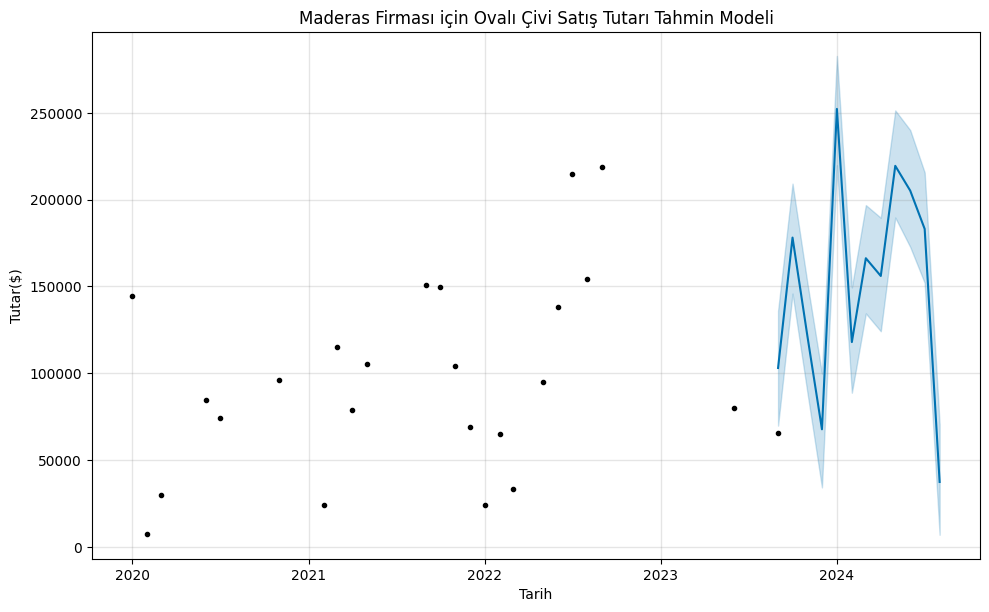

#####################################################################
#####################################################################
MAE: 2457330.888
MAE: 2457330.888


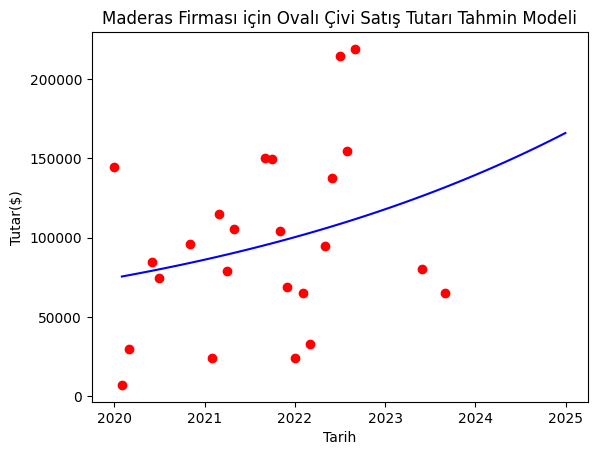

In [57]:
df = df[df["ürün"] == "OVALI ÇİVİLER"]

data = df.groupby(by="tarih")[["tutar"]].sum().reset_index()
data .columns = ["ds", "y"]

print("#####################################################################")
print("#####################################################################")

data["ds"] = pd.to_datetime(data["ds"])
data["ds"] = data["ds"].dt.strftime("%Y.%m")
data = data.groupby("ds")["y"].sum().to_frame()
data = data.reset_index()
data["ds"] = pd.to_datetime(data["ds"])

# Modelin kurulumu
from prophet import Prophet
model = Prophet()
model.fit(data)

data.dtypes

future = list()
for i in range(9,21):
  if i <=12:
    date = "2023-%02d" %i
  else:
    date = "2024-%02d" %(i-12)
  future.append([date])

future = pd.DataFrame(future)
future.columns =["ds"]
future["ds"] = pd.to_datetime(future["ds"])
forecast = model.predict(future)

# Tahminler
print(forecast [["ds", "yhat", "yhat_lower", "yhat_upper"]])

print("#####################################################################")
print("#####################################################################")

model.plot(forecast)
pyplot.xlabel("Tarih")
pyplot.ylabel("Tutar($)")
pyplot.title("Maderas Firması için Ovalı Çivi Satış Tutarı Tahmin Modeli")
pyplot.show()


print("#####################################################################")
print("#####################################################################")

#Hata değerleri
y_true = data["y"][-12:].values
y_pred = forecastx["yhat"].values

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)

import pandas as pd
df = data.sort_values(by="ds")
df["ds"] = pd.to_datetime(df["ds"], format="%Y-%m")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=12)
X = df["ds"].values.reshape(-1, 1)
y = df["y"].values
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

future_dates = pd.date_range(start="2020-01-01", end="2024-12-31", freq="M")
future_X = future_dates.values.reshape(-1, 1)
future_X_poly = poly_reg.transform(future_X)
future_y_pred = lin_reg.predict(future_X_poly)

import matplotlib.pyplot as plt
plt.scatter(X, y, color="red")
plt.plot(future_X, future_y_pred, color="blue")


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)
r2 = r2_score(y, lin_reg.predict(X_poly))
mae = mean_absolute_error(y, lin_reg.predict(X_poly))

plt.title("Maderas Firması için Ovalı Çivi Satış Tutarı Tahmin Modeli")
plt.xlabel("Tarih")
plt.ylabel("Tutar($)")
plt.show()



#### 5- AGLOLAK, S.L.

In [59]:
# dfaglolak değişkeninin oluşturulması
df = dfc[dfc["musteri"] == "AGLOLAK, S.L."]
df = df[["ürün", "tarih", "kg", "tutar"]]

#dfmaderas istatiksel bilgiler
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

# dfaglolak değişkeninin oluşturulması
df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

# dfaglolak grafiği
fig = px.scatter(df_grouped, x="tarih", y="tutar", color="ürün")
fig.update_layout(title={'text': 'AGLOLAK, S.L.', 'x': 0.5},legend_title=None)
fig.show()

                    tutar                                    
                      sum          mean   median          std
ürün                                                         
OVALI ÇİVİLER  1757766.57  10219.573081  9562.95  9019.032715
#####################################################################
#####################################################################


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


#####################################################################
#####################################################################


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/enel5jr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/4dsffmy5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99803', 'data', 'file=/tmp/tmpedc0eqid/enel5jr5.json', 'init=/tmp/tmpedc0eqid/4dsffmy5.json', 'output', 'file=/tmp/tmpedc0eqid/prophet_model8kutt0kn/prophet_model-20231009053050.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:30:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
0  2023-09-01  130563.573277  111906.157063  148818.246635
1  2023-10-01  309899.346837  291364.456944  328460.415646
2  2023-11-01   40303.472368   22040.622308   58035.017633
3  2023-12-01 -173470.352252 -189907.487116 -156453.448504
4  2024-01-01   52311.599254   34033.793389   72054.429811
5  2024-02-01   72653.825721   54351.501283   90353.039972
6  2024-03-01   52813.947662   33487.394513   70644.476828
7  2024-04-01   54924.687214   36298.821257   73337.966797
8  2024-05-01   60963.305983   44111.520441   80214.254622
9  2024-06-01  183884.896865  164746.512180  200954.760831
10 2024-07-01  109720.039615   91022.707207  127473.178006
11 2024-08-01   87376.927061   70551.194308  106846.694259
#####################################################################
#####################################################################


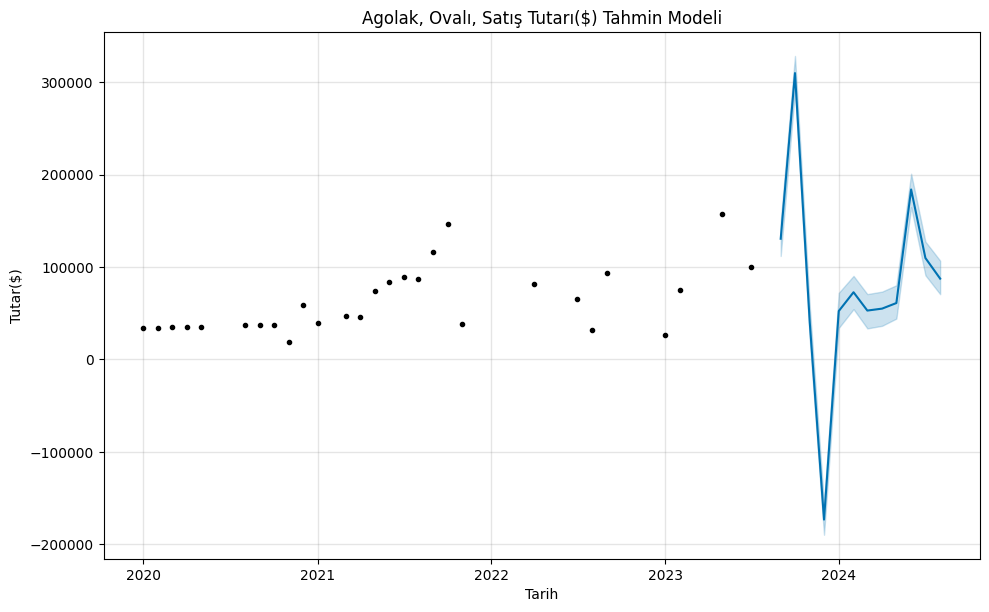

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/fv9fmkfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/h96zn6nh.json


#####################################################################
#####################################################################
MAE: 2477595.403
#####################################################################
#####################################################################
#####################################################################
#####################################################################


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21309', 'data', 'file=/tmp/tmpedc0eqid/fv9fmkfq.json', 'init=/tmp/tmpedc0eqid/h96zn6nh.json', 'output', 'file=/tmp/tmpedc0eqid/prophet_modelhxpmk2_b/prophet_model-20231009053052.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:30:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#####################################################################
#####################################################################
MAE: 2477595.403


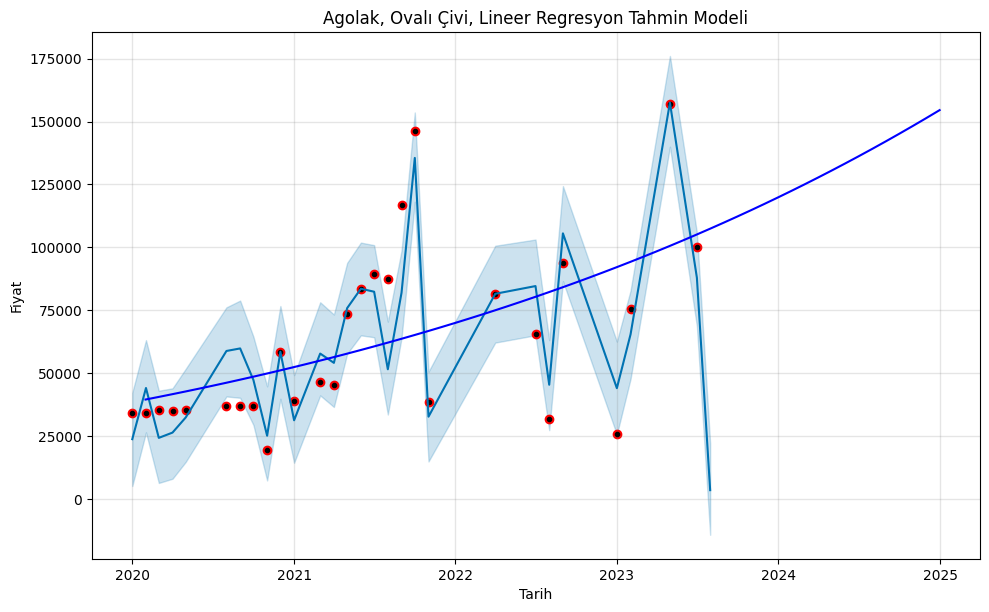

In [60]:
dfagolakovalı = df_grouped[df_grouped["ürün"] == "OVALI ÇİVİLER"]

data = dfagolakovalı.groupby(by="tarih")[["tutar"]].sum().reset_index()
data .columns = ["ds", "y"]

print("#####################################################################")
print("#####################################################################")

data["ds"] = pd.to_datetime(data["ds"])
data["ds"] = data["ds"].dt.strftime("%Y.%m")
data = data.groupby("ds")["y"].sum().to_frame()
data = data.reset_index()
data["ds"] = pd.to_datetime(data["ds"])

# Modelin kurulumu
from prophet import Prophet
model = Prophet()
model.fit(data)

data.dtypes

future = list()
for i in range(9,21):
  if i <=12:
    date = "2023-%02d" %i
  else:
    date = "2024-%02d" %(i-12)
  future.append([date])

future = pd.DataFrame(future)
future.columns =["ds"]
future["ds"] = pd.to_datetime(future["ds"])
forecast = model.predict(future)

# Tahminler
print(forecast [["ds", "yhat", "yhat_lower", "yhat_upper"]])

print("#####################################################################")
print("#####################################################################")

model.plot(forecast)
pyplot.xlabel("Tarih")
pyplot.ylabel("Tutar($)")
pyplot.title("Agolak, Ovalı, Satış Tutarı($) Tahmin Modeli")
pyplot.show()


print("#####################################################################")
print("#####################################################################")

#Hata değerleri
y_true = data["y"][-12:].values
y_pred = forecastx["yhat"].values

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)

print("#####################################################################")
print("#####################################################################")

dfa = df_grouped[df_grouped["ürün"] == "OVALI ÇİVİLER"]

data = dfa.groupby(by="tarih")[["tutar"]].sum().reset_index()
data .columns = ["ds", "y"]

print("#####################################################################")
print("#####################################################################")

data["ds"] = pd.to_datetime(data["ds"])
data["ds"] = data["ds"].dt.strftime("%Y.%m")
data = data.groupby("ds")["y"].sum().to_frame()
data = data.reset_index()
data["ds"] = pd.to_datetime(data["ds"])

p = Prophet(interval_width=0.80, daily_seasonality=True)
model = p.fit(data)

future = p.make_future_dataframe(periods=1, freq='M')

forecast_prediction = p.predict(future)
forecast_prediction.tail()

plot1 = p.plot(forecast_prediction)

print("#####################################################################")
print("#####################################################################")

import pandas as pd
data = data.sort_values(by="ds")
data["ds"] = pd.to_datetime(data["ds"], format="%Y-%m")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=13)
X = data["ds"].values.reshape(-1, 1)
y = data["y"].values
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

future_dates = pd.date_range(start="2020-01-01", end="2024-12-31", freq="M")
future_X = future_dates.values.reshape(-1, 1)
future_X_poly = poly_reg.transform(future_X)
future_y_pred = lin_reg.predict(future_X_poly)

import matplotlib.pyplot as plt
plt.scatter(X, y, color="red")
plt.plot(future_X, future_y_pred, color="blue")


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)
r2 = r2_score(y, lin_reg.predict(X_poly))
mae = mean_absolute_error(y, lin_reg.predict(X_poly))

plt.title("Agolak, Ovalı Çivi, Lineer Regresyon Tahmin Modeli")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()


#### 6- PALSER- B

                    tutar                                   
                      sum         mean   median          std
ürün                                                        
OVALI ÇİVİLER  1528354.62  2658.008035  1197.23  3646.214924
DÜZ ÇİVİLER     220844.98  1206.803169  1074.25  1300.255118
#####################################################################
#####################################################################


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/96q5r3gx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedc0eqid/ogrde1uf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51685', 'data', 'file=/tmp/tmpedc0eqid/96q5r3gx.json', 'init=/tmp/tmpedc0eqid/ogrde1uf.json', 'output', 'file=/tmp/tmpedc0eqid/prophet_model1nm3aw3n/prophet_model-20231009053054.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:30:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


#####################################################################
#####################################################################


05:30:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
0  2023-09-01  189652.918610  168406.273070  209163.910510
1  2023-10-01  246032.477090  226310.880213  266967.458083
2  2023-11-01   85770.397037   64471.263103  106093.178824
3  2023-12-01  -15987.183817  -37248.629793    5010.656120
4  2024-01-01   81255.168760   61513.099412  102247.005290
5  2024-02-01  100645.888200   78699.245912  122010.708171
6  2024-03-01  117347.180717   96858.984430  136867.978479
7  2024-04-01  110010.232663   89193.173272  131549.422487
8  2024-05-01   99566.518127   78265.505270  118854.187712
9  2024-06-01  109041.092719   88183.700279  129679.596020
10 2024-07-01  109361.270579   89898.758297  129425.172069
11 2024-08-01  120313.988667  100447.972279  140538.936357
#####################################################################
#####################################################################


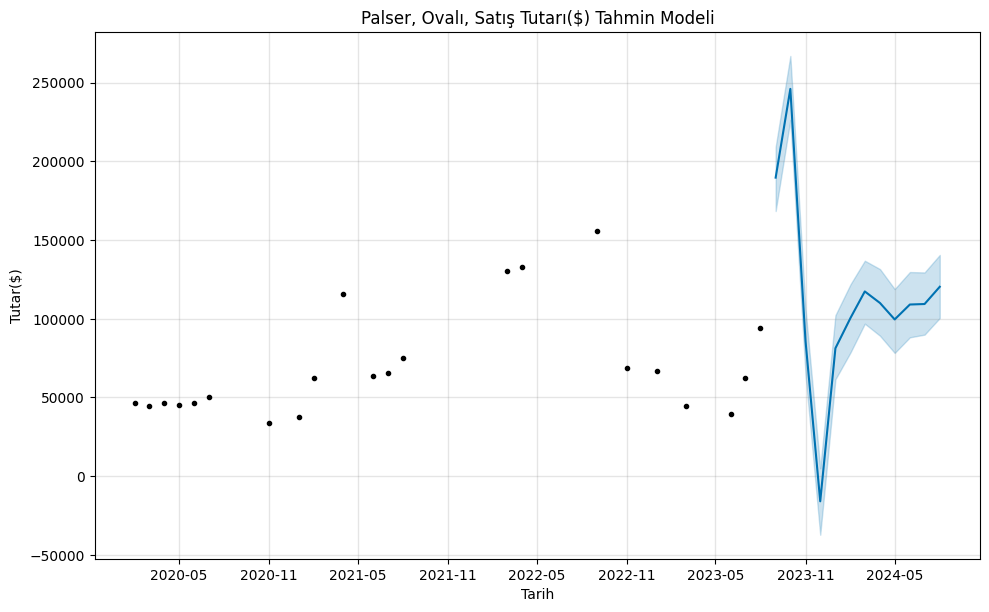

#####################################################################
#####################################################################
MAE: 2479219.708


In [61]:
# dfpalser değişkeninin oluştrulması
df = dfc[dfc["musteri"] == "PALSER- BIOENERGIA E PALETES, Lda."]
df = df[["ürün", "tarih", "kg", "tutar"]]

#dfpalser istatiksel bilgiler
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

# dfpal grafiği
df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'PALSER- BIOENERGIA E PALETES, Lda.', 'x': 0.5},legend_title=None)
fig.show()



df = df_grouped[df_grouped["ürün"] == "OVALI ÇİVİLER"]

data = df.groupby(by="tarih")[["tutar"]].sum().reset_index()
data .columns = ["ds", "y"]

print("#####################################################################")
print("#####################################################################")

data["ds"] = pd.to_datetime(data["ds"])
data["ds"] = data["ds"].dt.strftime("%Y.%m")
data = data.groupby("ds")["y"].sum().to_frame()
data = data.reset_index()
data["ds"] = pd.to_datetime(data["ds"])

# Modelin kurulumu
from prophet import Prophet
model = Prophet()
model.fit(data)

data.dtypes

future = list()
for i in range(9,21):
  if i <=12:
    date = "2023-%02d" %i
  else:
    date = "2024-%02d" %(i-12)
  future.append([date])

future = pd.DataFrame(future)
future.columns =["ds"]
future["ds"] = pd.to_datetime(future["ds"])
forecast = model.predict(future)

# Tahminler
print(forecast [["ds", "yhat", "yhat_lower", "yhat_upper"]])

print("#####################################################################")
print("#####################################################################")

model.plot(forecast)
pyplot.xlabel("Tarih")
pyplot.ylabel("Tutar($)")
pyplot.title("Palser, Ovalı, Satış Tutarı($) Tahmin Modeli")
pyplot.show()


print("#####################################################################")
print("#####################################################################")

#Hata değerleri
y_true = data["y"][-12:].values
y_pred = forecastx["yhat"].values

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)

##### Palser ovalı çivi

MAE: 2479219.708


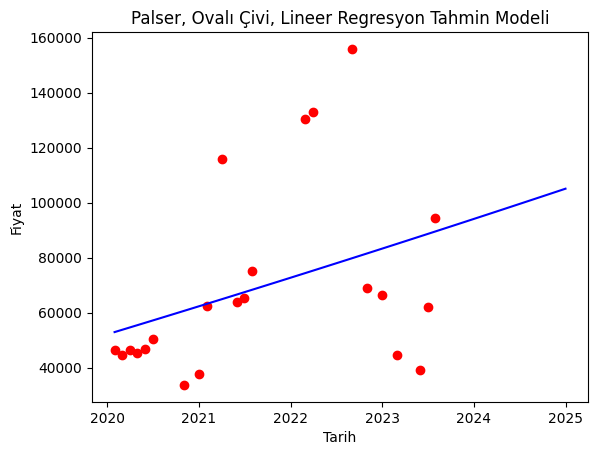

In [62]:

data = data.sort_values(by="ds")
data["ds"] = pd.to_datetime(data["ds"], format="%Y-%m")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=2)
X = data["ds"].values.reshape(-1, 1)
y = data["y"].values
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

future_dates = pd.date_range(start="2020-01-01", end="2024-12-31", freq="M")
future_X = future_dates.values.reshape(-1, 1)
future_X_poly = poly_reg.transform(future_X)
future_y_pred = lin_reg.predict(future_X_poly)

import matplotlib.pyplot as plt
plt.scatter(X, y, color="red")
plt.plot(future_X, future_y_pred, color="blue")


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)
r2 = r2_score(y, lin_reg.predict(X_poly))
mae = mean_absolute_error(y, lin_reg.predict(X_poly))

plt.title("Palser, Ovalı Çivi, Lineer Regresyon Tahmin Modeli")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()


##### Palser düz çivi

MAE: 2479219.708


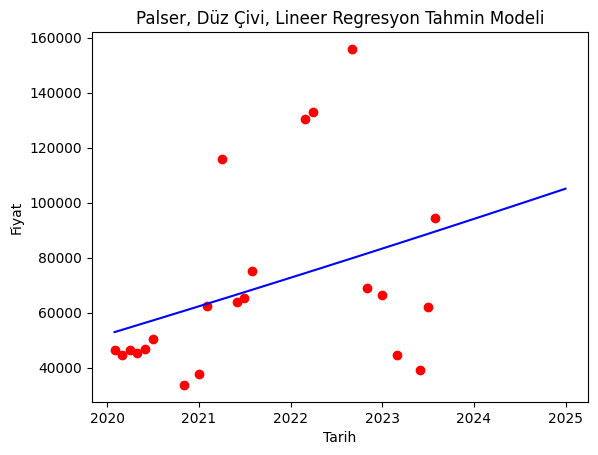

In [63]:
dfpal = df_grouped[df_grouped["ürün"] == "DÜz ÇİVİLER"]

data = data.sort_values(by="ds")
data["ds"] = pd.to_datetime(data["ds"], format="%Y-%m")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=2)
X = data["ds"].values.reshape(-1, 1)
y = data["y"].values
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

future_dates = pd.date_range(start="2020-01-01", end="2024-12-31", freq="M")
future_X = future_dates.values.reshape(-1, 1)
future_X_poly = poly_reg.transform(future_X)
future_y_pred = lin_reg.predict(future_X_poly)

import matplotlib.pyplot as plt
plt.scatter(X, y, color="red")
plt.plot(future_X, future_y_pred, color="blue")

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)
r2 = r2_score(y, lin_reg.predict(X_poly))
mae = mean_absolute_error(y, lin_reg.predict(X_poly))

plt.title("Palser, Düz Çivi, Lineer Regresyon Tahmin Modeli")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()

#### 8- THIBO

In [65]:
df= dfc[dfc["musteri"] == "THIBO"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'THIBO', 'x': 0.5},legend_title=None)
fig.show()

                    tutar                                   
                      sum         mean   median          std
ürün                                                        
OVALI ÇİVİLER  1282995.44  5194.313522  3195.84  6059.273663
DÜZ ÇİVİLER      83929.81  2268.373243  1667.70  2180.999193
#####################################################################
#####################################################################


#### 9- SCOTT T

In [66]:
df= dfc[dfc["musteri"] == "SCOTT TIMBER LTD"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'SCOTT TIMBER LTD', 'x': 0.5},legend_title=None)
fig.show()

                    tutar                                   
                      sum         mean   median          std
ürün                                                        
OVALI ÇİVİLER  1155686.89  6114.745450  4610.77  6924.453469
DÜZ ÇİVİLER      99189.37  3005.738485  1638.54  2459.740559
#####################################################################
#####################################################################


#### 12- JAMES J

In [69]:
df= dfc[dfc["musteri"] == "JAMES JONES & SONS LIMITED PALLETS &PACKAGING"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'JAMES JONES & SONS LIMITED PALLETS & PACKAGING', 'x': 0.5},legend_title=None)

                   tutar                                    
                     sum         mean    median          std
ürün                                                        
OVALI ÇİVİLER  931996.88  7639.318689  5717.825  6682.423006
DÜZ ÇİVİLER    183706.72  6334.714483  4962.110  6196.812020
#####################################################################
#####################################################################


#### 13- MADECA-M

In [70]:
df= dfc[dfc["musteri"] == "MADECA-Madeiras de Caxarias, S.A."]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'MADECA-Madeiras de Caxarias, S.A.', 'x': 0.5},legend_title=None)

                   tutar                                     
                     sum          mean    median          std
ürün                                                         
OVALI ÇİVİLER  880413.54  15445.851579  17450.83  9996.076648
DÜZ ÇİVİLER    145598.29   4549.946563   4818.75  2544.934637
#####################################################################
#####################################################################


#### 14- SPIKER AS

In [71]:
df= dfc[dfc["musteri"] == "SPIKER AS"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'SPIKER AS', 'x': 0.5}, legend_title=None)

                   tutar                                   
                     sum         mean   median          std
ürün                                                       
OVALI ÇİVİLER  748028.14  7406.219208  7498.76  3820.042610
DÜZ ÇİVİLER    188302.87  4707.571750  5266.83  2182.791818
T.DİZ.ÇİVİLER   14898.49  1064.177857  1126.58   452.661734
#####################################################################
#####################################################################


#### 15- MADERAS AGUILAR

In [72]:
df= dfc[dfc["musteri"] == "MADERAS AGUILAR S.L."]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'MADERAS AGUILAR S.L.', 'x': 0.5}, legend_title=None)

                   tutar                                    
                     sum         mean    median          std
ürün                                                        
OVALI ÇİVİLER  733794.12  9288.533165  11324.18  6816.401085
DÜZ ÇİVİLER    197011.13  3456.335614   4855.30  2638.621817
#####################################################################
#####################################################################


#### 19- PGB-EUROPE

In [76]:
df= dfc[dfc["musteri"] == "PGB-EUROPE N.V"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'PGB-EUROPE N.V', 'x': 0.5}, legend_title=None)

                 tutar                                 
                   sum        mean  median          std
ürün                                                   
DÜZ ÇİVİLER  649296.67  1459.09364  821.99  1923.602168
#####################################################################
#####################################################################


#### 22- IZIFIX - MAT

In [79]:
df= dfc[dfc["musteri"] == "IZIFIX - MATERIAIS DE FIXACAO, LDA."]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'IZIFIX - MATERIAIS DE FIXACAO, LDA.	', 'x': 0.5}, legend_title=None)

                   tutar                                    
                     sum         mean    median          std
ürün                                                        
T.DİZ.ÇİVİLER  566792.93  2673.551557  2319.095  2001.235906
OVALI ÇİVİLER   49512.28  2750.682222  2314.540  1923.067751
DÜZ ÇİVİLER     14704.85  2450.808333  2413.665  1921.707265
#####################################################################
#####################################################################


#### 23- PALETS SU.

In [80]:
df= dfc[dfc["musteri"] == "PALETS SULLER, S.L."]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'PALETS SULLER, S.L.', 'x': 0.5}, legend_title=None)

                   tutar                                   
                     sum         mean   median          std
ürün                                                       
OVALI ÇİVİLER  510227.47  6713.519342  5195.24  6885.493940
DÜZ ÇİVİLER     50545.95  3159.121875  3218.18  2128.827003
#####################################################################
#####################################################################


#### 24- KAMMARTON B

In [81]:
df= dfc[dfc["musteri"] == "KAMMARTON BULGARIA LTD."]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'KAMMARTON BULGARIA LTD.', 'x': 0.5}, legend_title=None)

                   tutar                                   
                     sum         mean   median          std
ürün                                                       
T.DİZ.ÇİVİLER  509451.93  2437.569043  1819.79  1863.793067
OVALI ÇİVİLER   28951.88  1523.783158  1040.41  1071.006305
#####################################################################
#####################################################################


#### 26- SOUTHWESTERN S.

In [83]:
df= dfc[dfc["musteri"] == "SOUTHWESTERN SUPPLIERS, INC."]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'SOUTHWESTERN SUPPLIERS, INC.', 'x': 0.5}, legend_title=None)

                            tutar                                       
                              sum          mean     median           std
ürün                                                                    
T.DİZ.ÇİVİLER            438400.9  19927.313636  22174.575  11052.952104
PLASTİĞE DİZİLİ ÇİVİLER   20212.1   5053.025000   4465.520   4079.445963
#####################################################################
#####################################################################


#### 30-VAMVACAS IND.

In [87]:
df= dfc[dfc["musteri"] == "VAMVACAS INDUSTRIAL EQUIPMENT S.A."]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'VAMVACAS INDUSTRIAL EQUIPMENT S.A.	.	', 'x': 0.5}, legend_title=None)

                   tutar                                   
                     sum         mean   median          std
ürün                                                       
T.DİZ.ÇİVİLER  252586.36  2140.562373  1965.52  1220.090938
OVALI ÇİVİLER  107635.10  1793.918333  1417.46  1066.562884
DÜZ ÇİVİLER      4455.49   891.098000   754.65   288.058336
#####################################################################
#####################################################################


#### 31- SELKENT

#### 32- ERKO I

In [89]:
df= dfc[dfc["musteri"] == "ERKO INDUSTRIAL TOOLS(E.K) LTD"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'ERKO INDUSTRIAL TOOLS(E.K) LTD', 'x': 0.5}, legend_title=None)

                   tutar                                    
                     sum         mean    median          std
ürün                                                        
T.DİZ.ÇİVİLER  311458.57  4719.069242  3531.315  5231.091642
OVALI ÇİVİLER   40808.02  3709.820000  1368.730  6976.119769
DÜZ ÇİVİLER      2228.81  2228.810000  2228.810          NaN
#####################################################################
#####################################################################


#### 34- ATLANTSHAV

In [91]:
df= dfc[dfc["musteri"] == "ATLANTSHAV Sp/F"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'ATLANTSHAV Sp/F', 'x': 0.5}, legend_title=None)

                   tutar                                     
                     sum          mean    median          std
ürün                                                         
OVALI ÇİVİLER  288521.83  12544.427391  10595.20  5385.532245
DÜZ ÇİVİLER     41626.11   4625.123333   4082.26  1323.464086
#####################################################################
#####################################################################


#### 36- PALLET T

In [93]:
df= dfc[dfc["musteri"] == "PALLET TAMA S.L."]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'PALLET TAMA S.L.', 'x': 0.5}, legend_title=None)

                   tutar                                    
                     sum         mean    median          std
ürün                                                        
OVALI ÇİVİLER  324777.83  5799.604107  4061.985  5256.126369
#####################################################################
#####################################################################


#### 38- SCIERIE

In [95]:
df= dfc[dfc["musteri"] == "SCIERIE MIGEON"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'SCIERIE MIGEON', 'x': 0.5}, legend_title=None)

                   tutar                                   
                     sum         mean   median          std
ürün                                                       
OVALI ÇİVİLER  259790.98  4403.236949  2747.77  6130.127772
DÜZ ÇİVİLER     25040.07  1669.338000  1150.18  2276.370376
#####################################################################
#####################################################################


#### 39- MPM P

In [96]:
df= dfc[dfc["musteri"] == "MPM PARTNERS D.O.O."]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'MPM PARTNERS D.O.O.', 'x': 0.5}, legend_title=None)

                   tutar                                     
                     sum          mean    median          std
ürün                                                         
OVALI ÇİVİLER  252629.85  12029.992857  11712.21  5819.270385
#####################################################################
#####################################################################


#### 40- DDCA R

In [97]:
df= dfc[dfc["musteri"] == "DDCA ROMANIA SRL"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'DDCA ROMANIA SRL', 'x': 0.5}, legend_title=None)

                   tutar                                   
                     sum         mean   median          std
ürün                                                       
OVALI ÇİVİLER  168329.93  7013.747083  5942.29  4766.142525
T.DİZ.ÇİVİLER   57560.32  2878.016000  2594.67  1659.129623
#####################################################################
#####################################################################


#### 47- PALCAX - F

In [104]:
df= dfc[dfc["musteri"] == "PALCAX - FABRICAÇAO DE PALETES E CAIXAS"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'PALCAX - FABRICAÇAO DE PALETES E CAIXAS', 'x': 0.5}, legend_title=None)

                   tutar                                    
                     sum         mean   median           std
ürün                                                        
OVALI ÇİVİLER  156350.37  8686.131667  1674.74  11191.600046
DÜZ ÇİVİLER     26455.34  6613.835000  6194.66   7667.614037
T.DİZ.ÇİVİLER   19821.18  1982.118000   398.09   3212.574439
#####################################################################
#####################################################################


#### 48- J.K.A. LUMBER

In [105]:
df= dfc[dfc["musteri"] == "J.K.A. LUMBER"]
df = df[["ürün", "tarih", "kg", "tutar"]]

df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

df_grouped = df.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()
print(df.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False))

print("#####################################################################")
print("#####################################################################")

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'J.K.A. LUMBER	', 'x': 0.5}, legend_title=None)

                   tutar                                    
                     sum       mean     median           std
ürün                                                        
T.DİZ.ÇİVİLER  200222.12  20022.212  27268.335  13478.134034
#####################################################################
#####################################################################
